# Visualisation of a generic multipole

This notebook shows how to numerically calculate and visualise the fields around an electrostatic multipole

load the required libraries for calculation and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

create grid to plot (choose 2D plane for visualisation cutting through charge centers , but calculation is correct for 3D)

In [120]:
xpoints=512 #nr of grid points in 1 direction
xmax=1 #extension of grid [m]
pref=9e9 # 1/(4pi eps0)
x=np.linspace(-xmax,xmax,xpoints)
y=x
[x2d,y2d]=np.meshgrid(x,y) #2D matrices holding x or y coordinate for each point on the grid

#define multipole
npoles=6 #number of poles, needs to be even
fradius=0.5*xmax #field radius
sradius=0.1*xmax #radius of spheres making up the multipole
vamp=1 #voltage amplitude on multipole

calculate the potential of the set of spheres (use a function that we can reuse later)

In [121]:
def multipolepotential(x,y,z,npoles,v,fradius,sradius):
    #assume a set of n conducting spheres of radius on a circle of radius fradius (field radius)
    #npoles is number of poles and needs to be even >0
    #the spheres are positioned in the xy plane and have a potential of V for the even spheres and -V for the odd spheres
    out=np.zeros(x.shape)
    potentialin=np.zeros(x.shape)
    potential=np.zeros(x.shape)
    theta=np.linspace(0,2*np.pi,npoles+1)
    if(npoles % 2) == 0:
        for nid in range(npoles):
            #make a superposition of the potential for each of the spheres
            vin=v*(-1.0)**nid            
            xn=fradius*np.cos(theta[nid])
            yn=fradius*np.sin(theta[nid])
            r=np.sqrt(np.square(x-xn)+np.square(y-yn)+np.square(z)) #distance to sphere n
            in1=r<sradius  #logical function 1 if inside sphere, 0 if outside
            out1=r>=sradius #logical function 0 if inside sphere, 1 if outside
            potential=potential+vin*sradius*np.multiply(np.power(r,-1),out1) 
            out=out+out1
            potentialin=potentialin+vin*in1  
        #do a rescaling to match potential as the superposition changes the actual potential on the spheres slighlty
        idin=np.where(potentialin)
        idout=np.where(out)
        potential[idin]=potentialin[idin]
        potential[idout]=v*(potential[idout]/np.max(potential[idout]))
    else:
        potential=None
        #undefined
    return potential

v=multipolepotential(x2d,y2d,np.zeros(x2d.shape),npoles,vamp,fradius,sradius)
ey,ex=np.gradient(v,y,x)  #strange ordering due to meshgrid
e=np.sqrt(ex**2+ey**2)

And now its showtime!

(-1.0978473581213306,
 1.054794520547945,
 -1.0978473581213306,
 1.054794520547945)

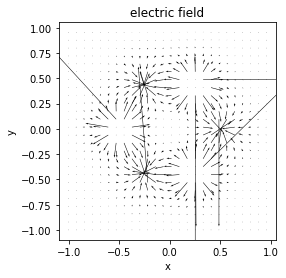

In [128]:
#show vector plot, but limit number of points to keep the number of vector reasonable
skippts=20
skip=(slice(None,None,skippts),slice(None,None,skippts)) #dont plot all points in a quiver as this becomes unreadable
plt.quiver(x2d[skip],y2d[skip],ex[skip],ey[skip])
plt.title('electric field')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

Note how the field emanates from the positive charge sinks into the negative charge

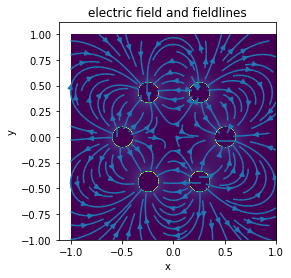

In [123]:
plt.imshow(e,extent=[-xmax, xmax, -xmax, xmax])
plt.title('electric field and fieldlines')
plt.xlabel('x');
plt.ylabel('y');
plt.streamplot(x2d,y2d,ex,ey)
plt.axis('square')
plt.colorbar
plt.show()

Note how the field is symmetrical along the x and y direction

Note how different the field strength and the fieldlines are for the approximated dipole vs the actual dipole. Only far away from the dipole are the fields approaching. Remember this if you ever want to apply the convenient dipole formula but might be too close to the actual dipole source.

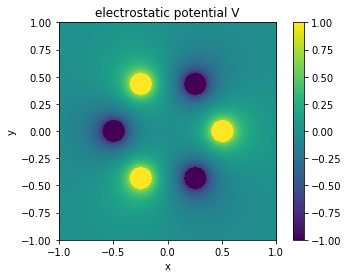

In [124]:
plt.imshow(v,extent=[-xmax, xmax, -xmax, xmax]) 
plt.title('electrostatic potential V')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.colorbar()
plt.show()



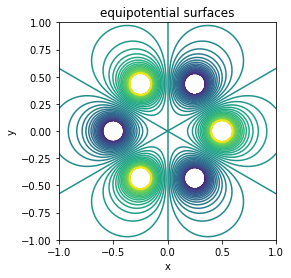

In [126]:
nlines=50;
plt.contour(x2d,y2d,v,nlines)
plt.title('equipotential surfaces')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.colorbar
plt.show()

Equipotential lines are always perpendicular to the fieldlines.